In [1]:
!python -m pip install matplotlib numpy scipy

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [71]:
from math import cos, sin, pow
import numpy as np

def f(x: float):
    return x + 10 * sin(x / 10) + 15 * sin(x / 5) + 20 * sin(x / 2)

x = np.linspace(-25, 25, 2 ** 16)
f_vectorize = np.vectorize(f)
y = f_vectorize(x)

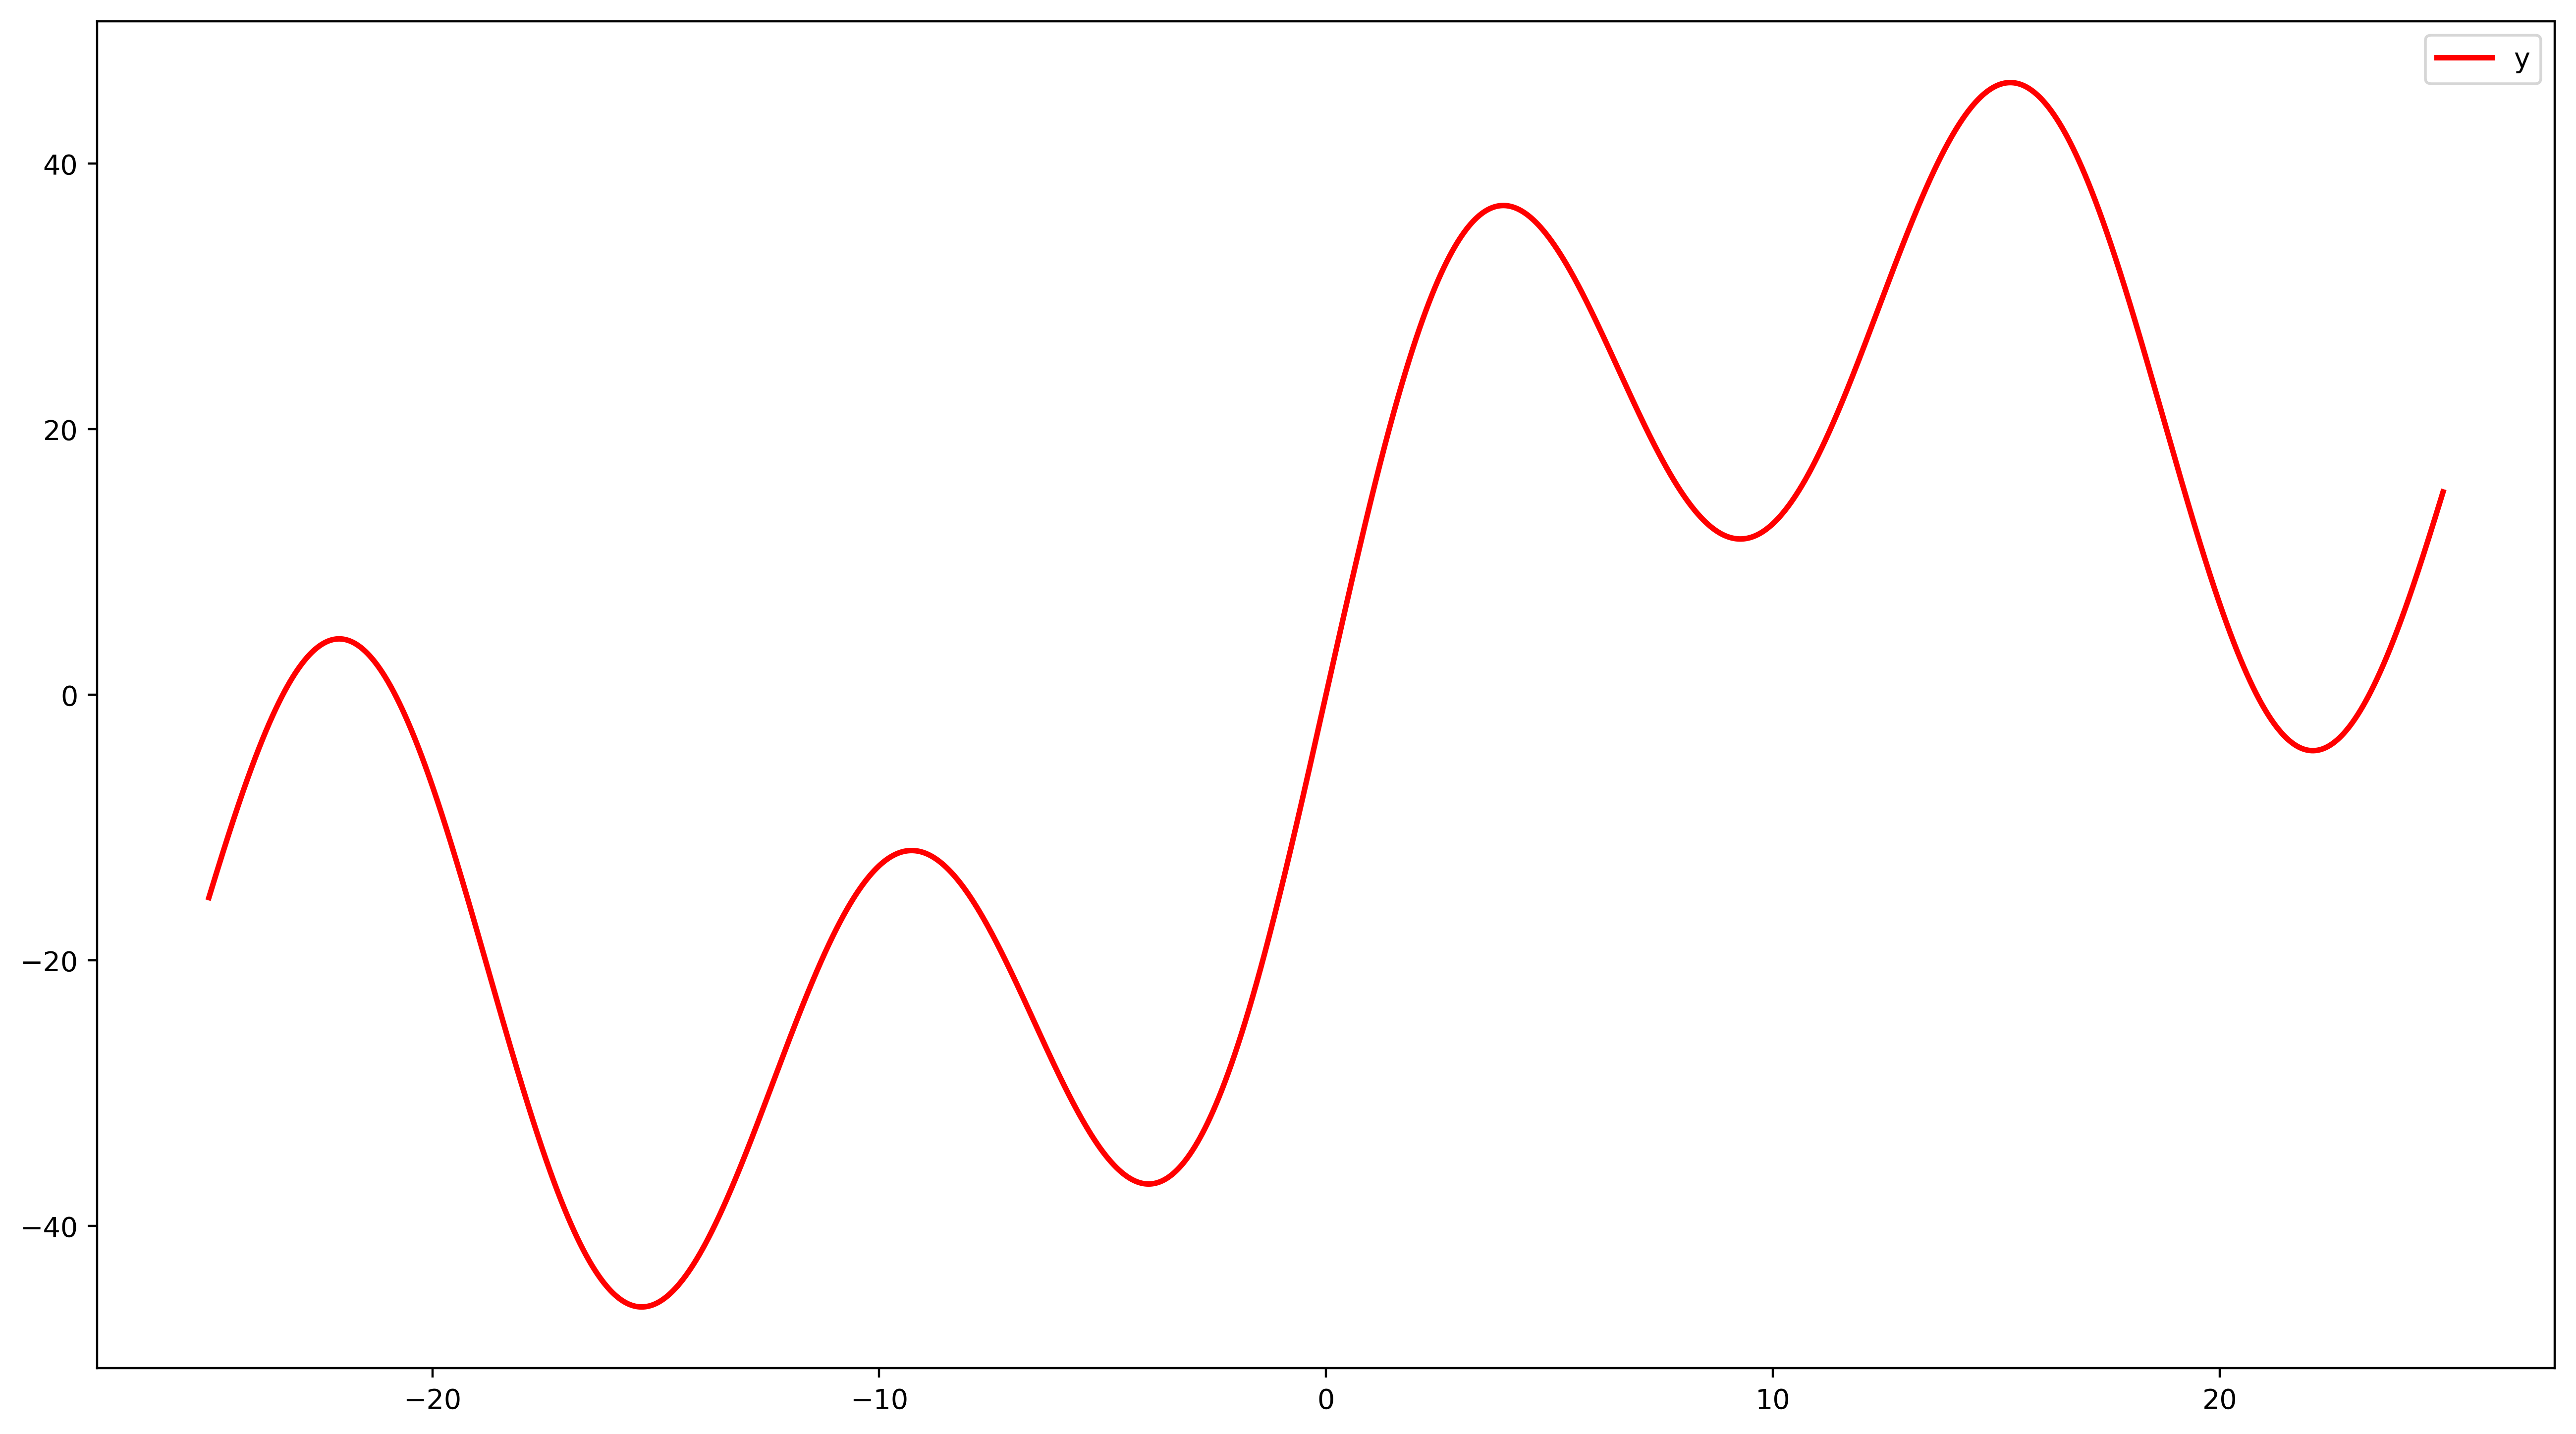

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y, color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

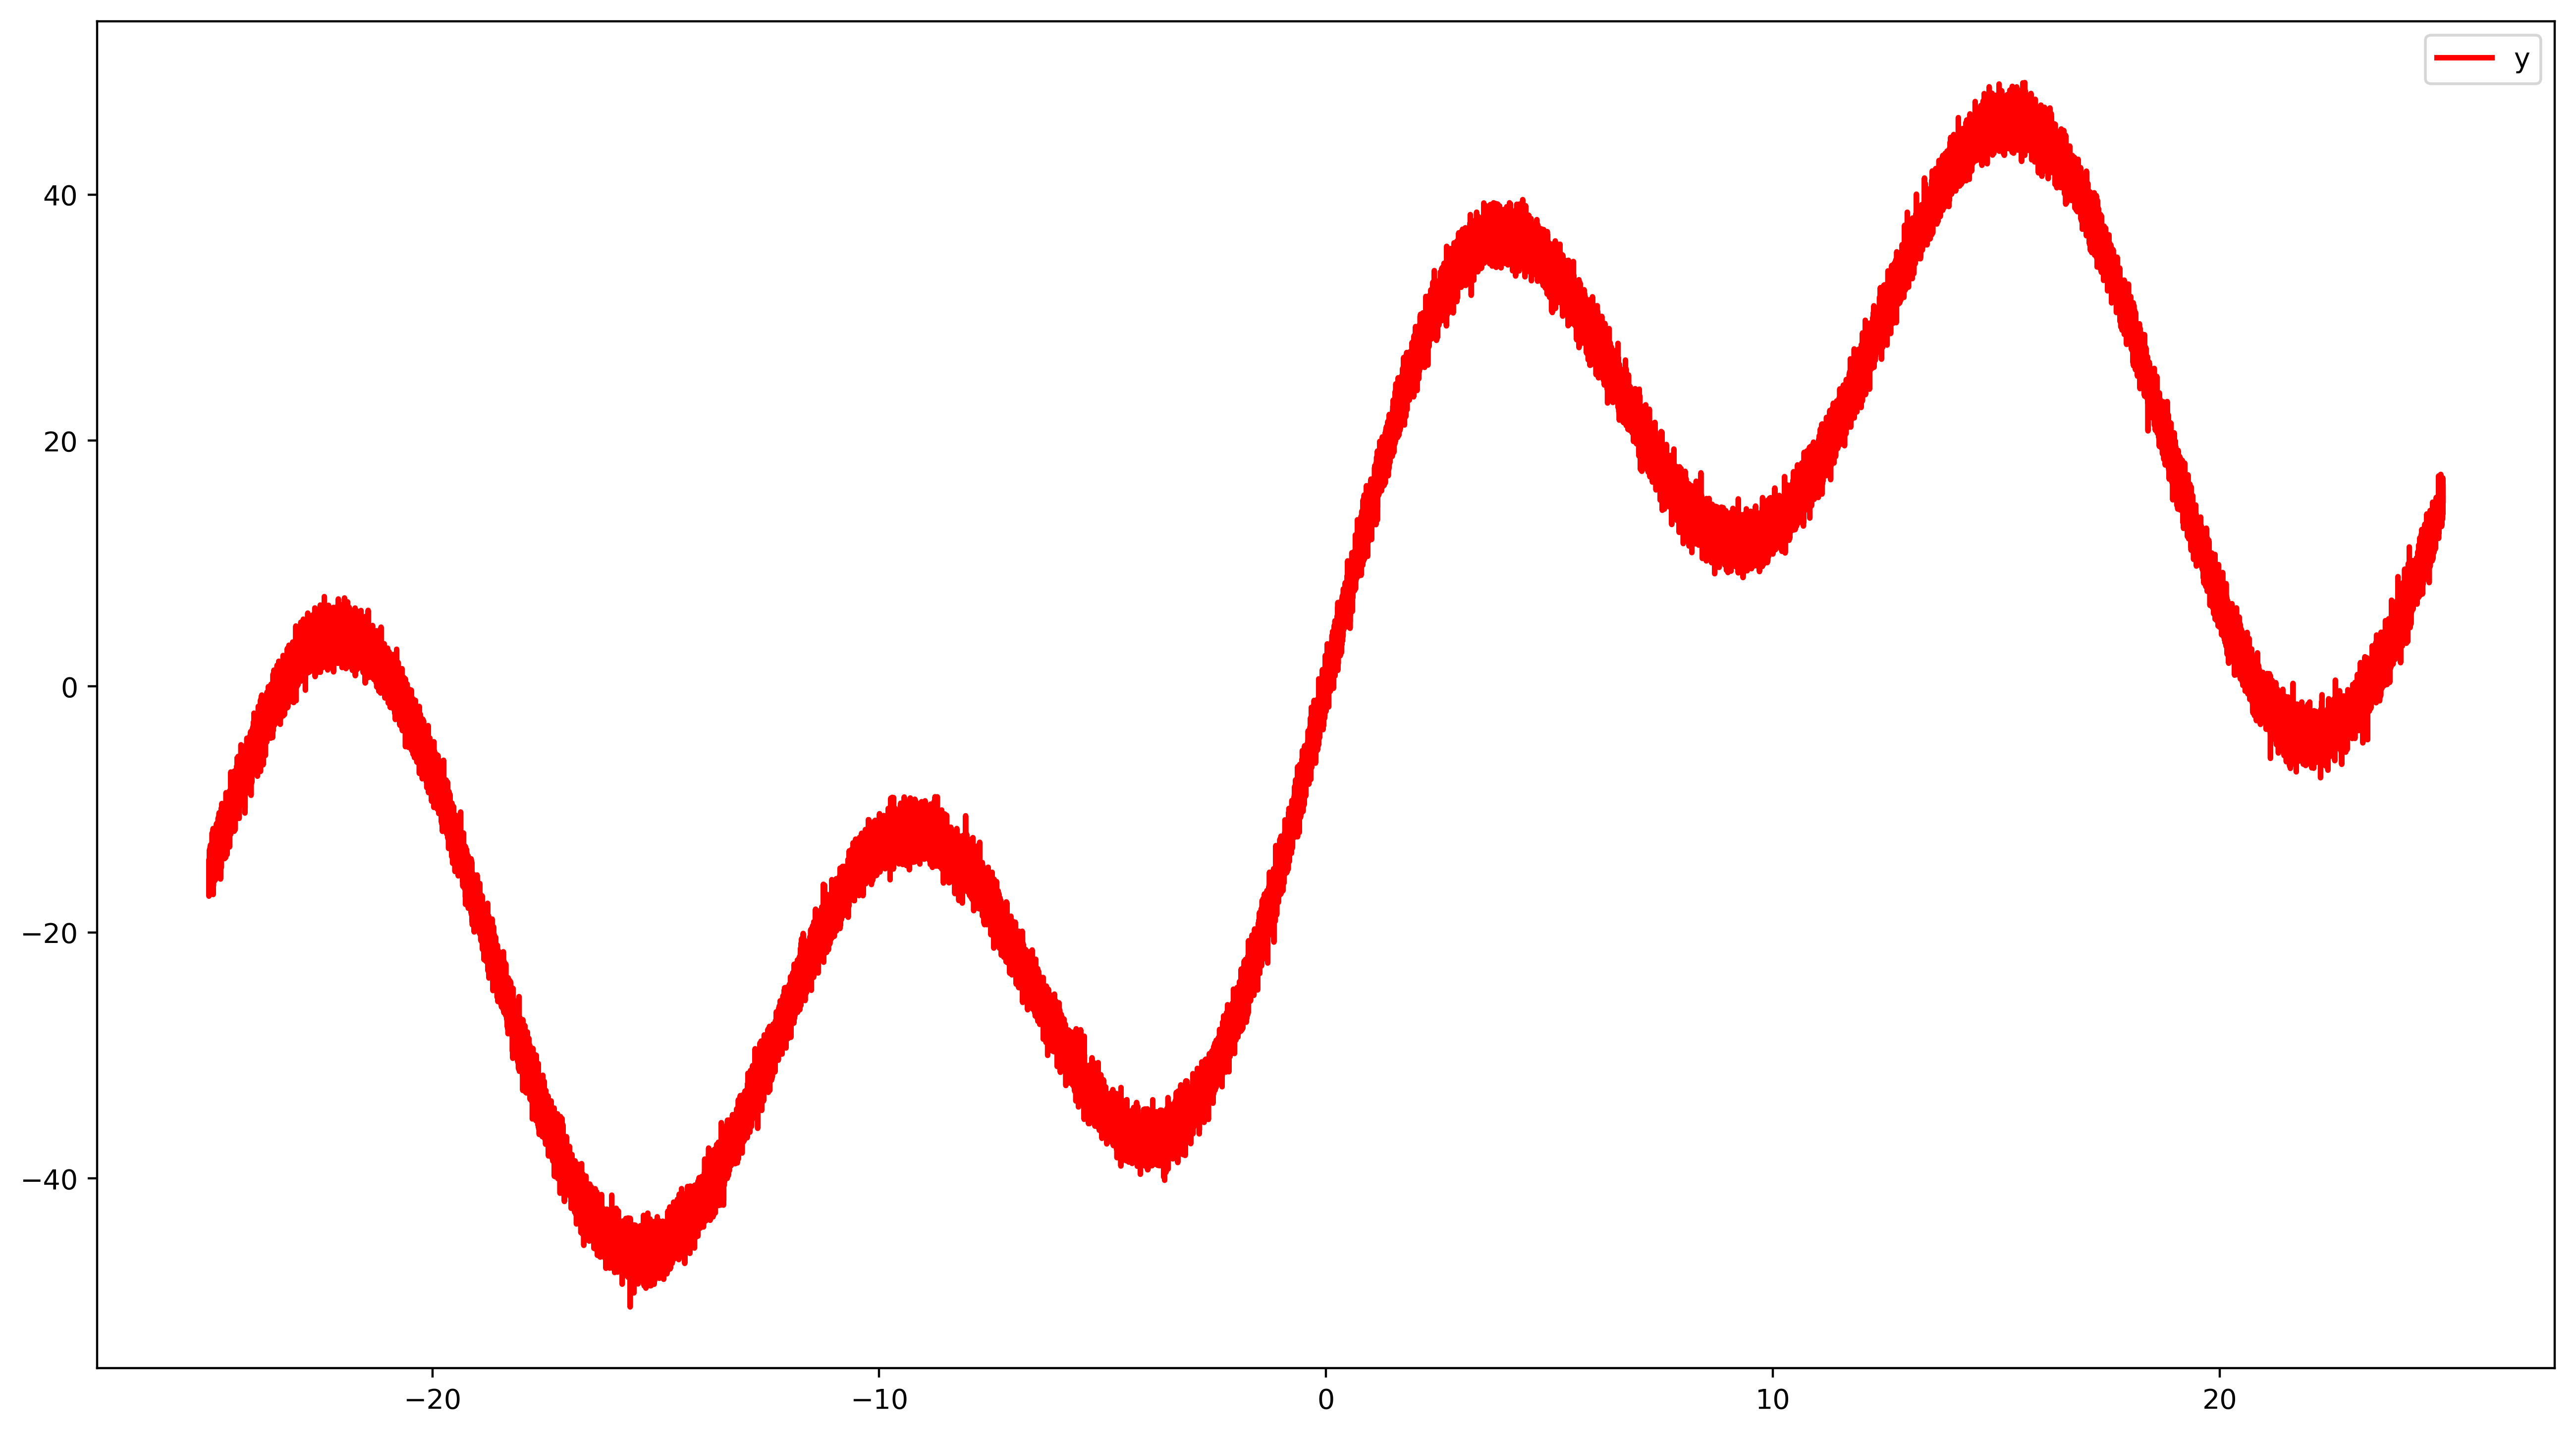

In [74]:
from numpy.random import normal
y_noise = y + normal(loc=0, scale=1, size=len(y))
fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

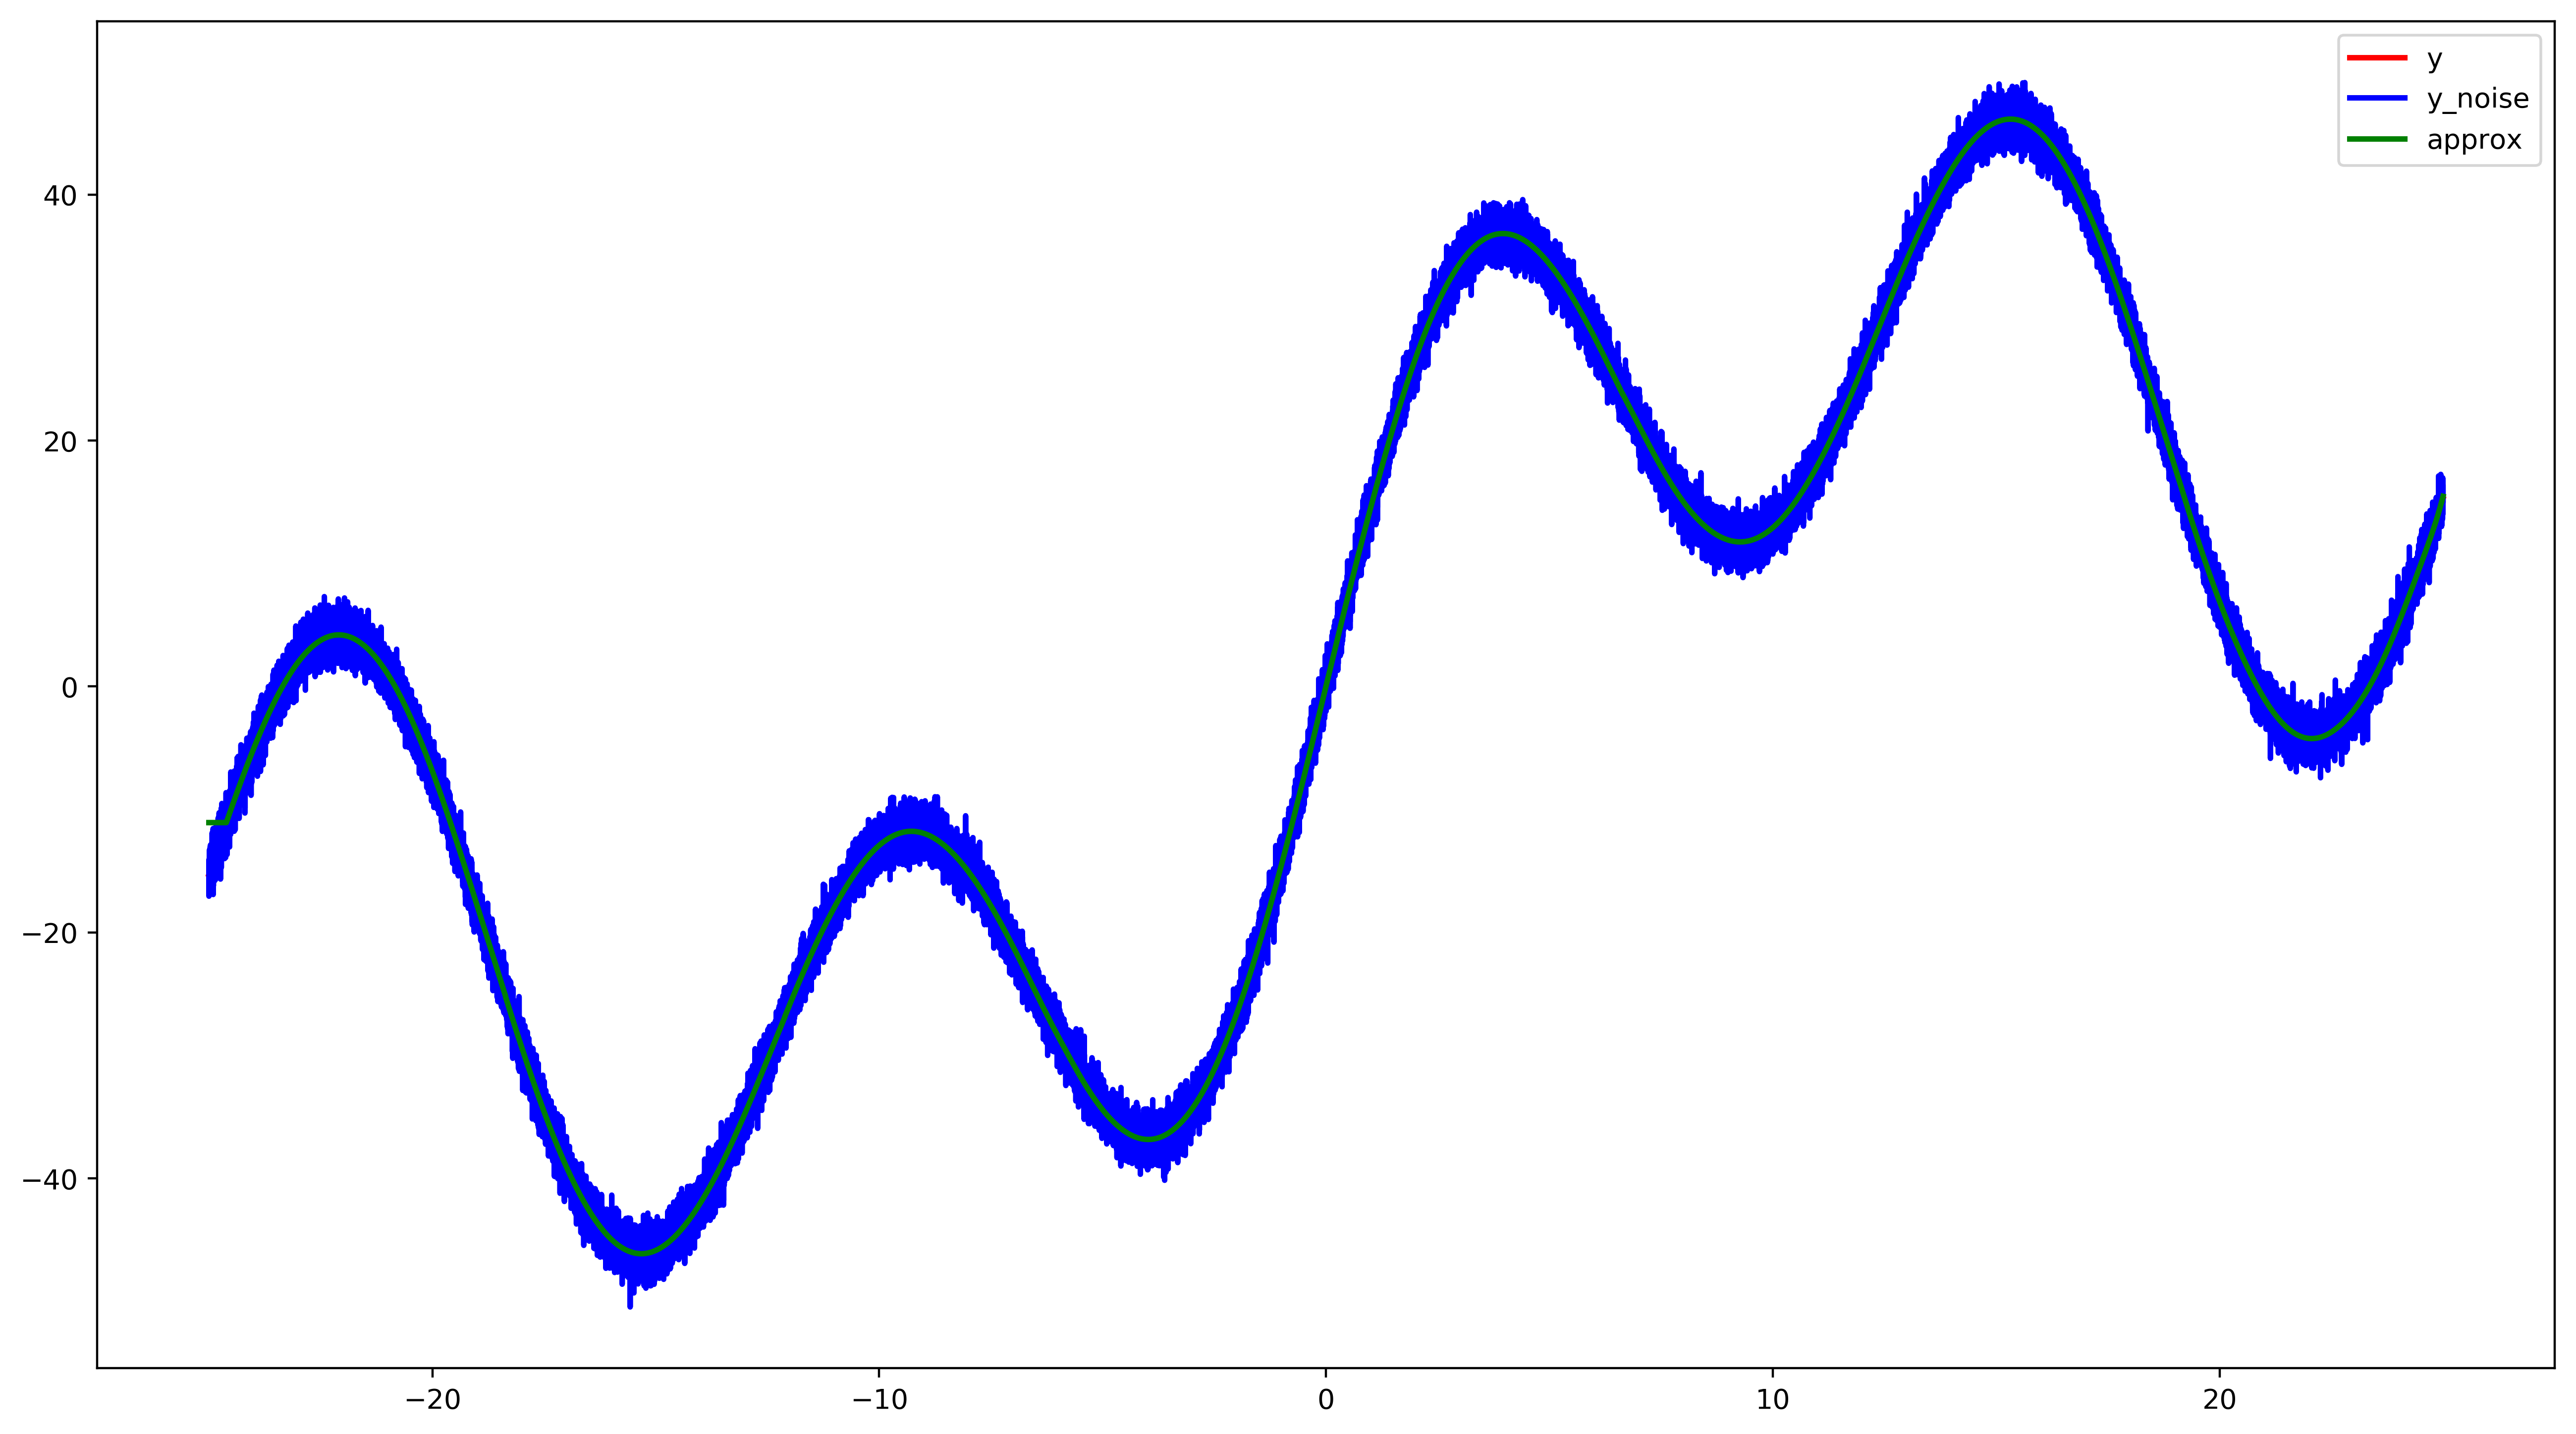

In [76]:
from numpy.polynomial import Polynomial

step = 8192
indent = 512
approx = np.zeros(indent)
for i in range(indent, len(x) - indent, step):
    c = Polynomial.fit(x[i - indent:i + step + indent], y_noise[i - indent:i + step + indent], deg=10)
    approx = np.append(approx, c(x[i:i + step]))
approx[:indent] = approx[indent]
approx = np.append(approx, np.full(len(y_noise) - len(approx), approx[-1]))
assert len(approx) == len(y_noise)

fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y, color = 'red', lw = 2, label = 'y')
subplot.plot(x, y_noise, color = 'blue', lw = 2, label = 'y_noise')
subplot.plot(x, approx, color = 'green', lw = 2, label = 'approx')
plt.legend()
plt.show()

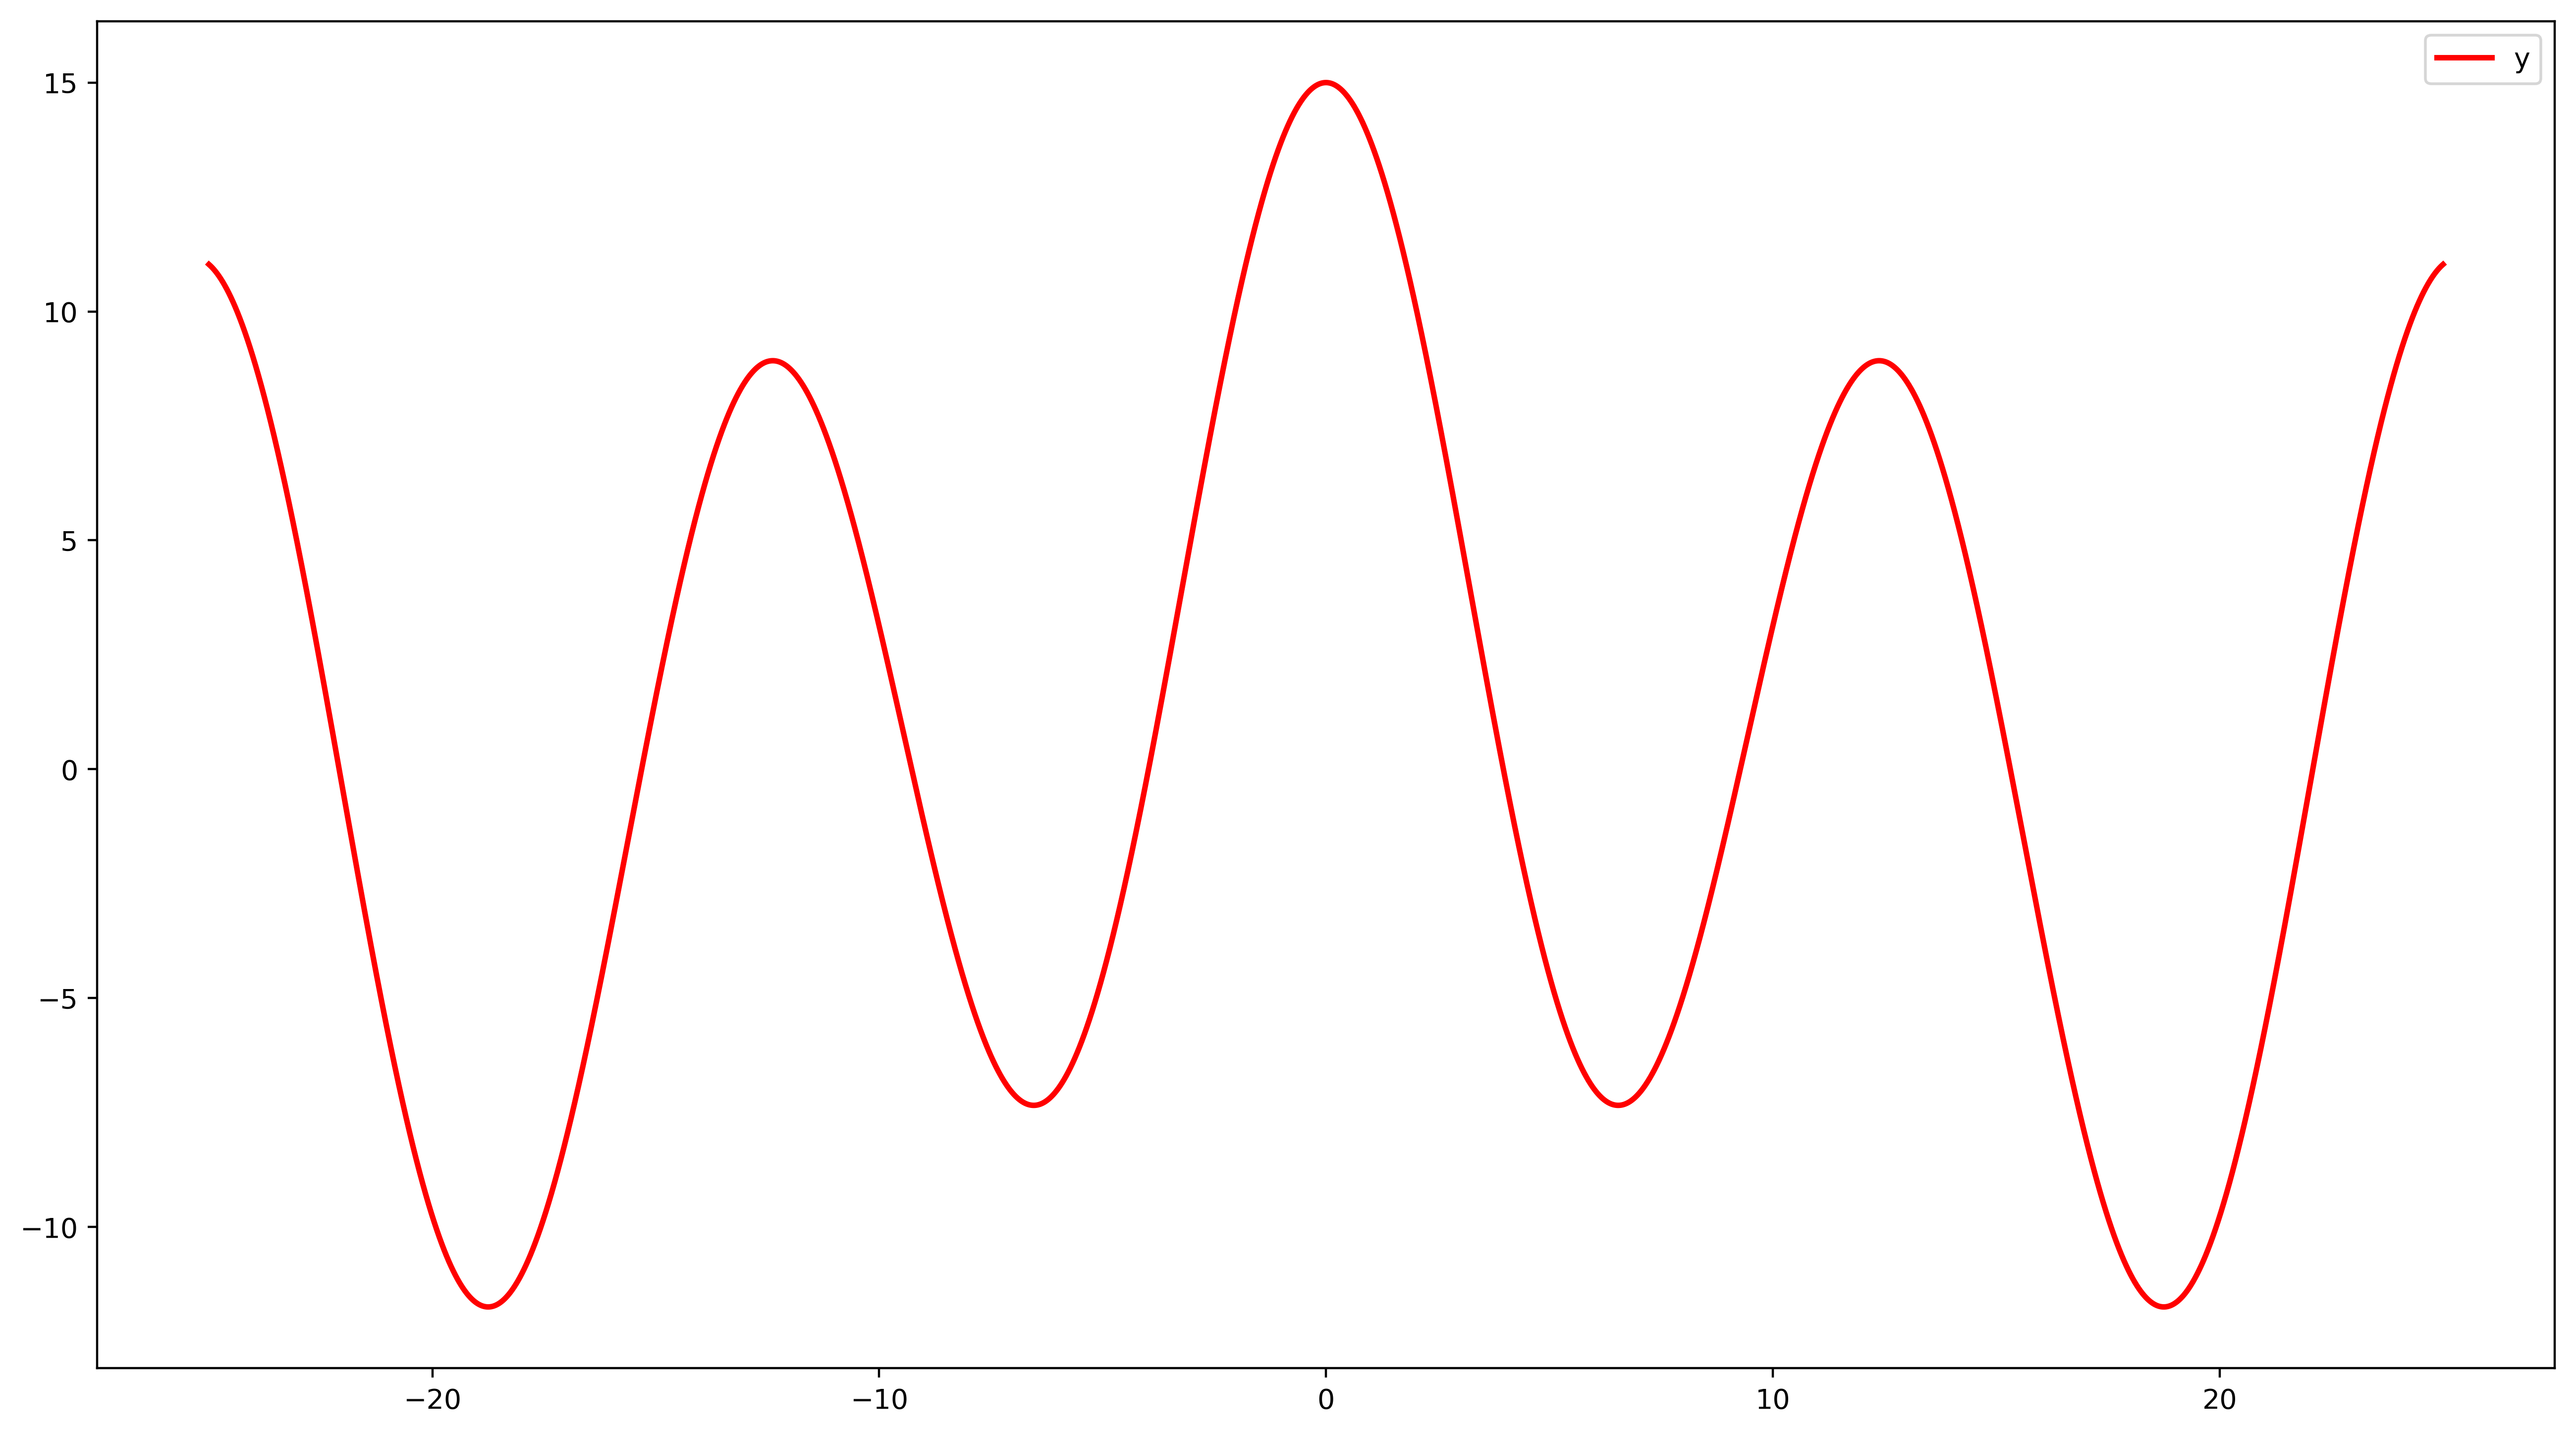

In [77]:
def f_prime(x: float):
    return 1 + cos(x / 10) + 3 * cos(x / 5) + 10 * cos(x / 2)

f_prime_vectorize = np.vectorize(f_prime)

fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, f_prime_vectorize(x), color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

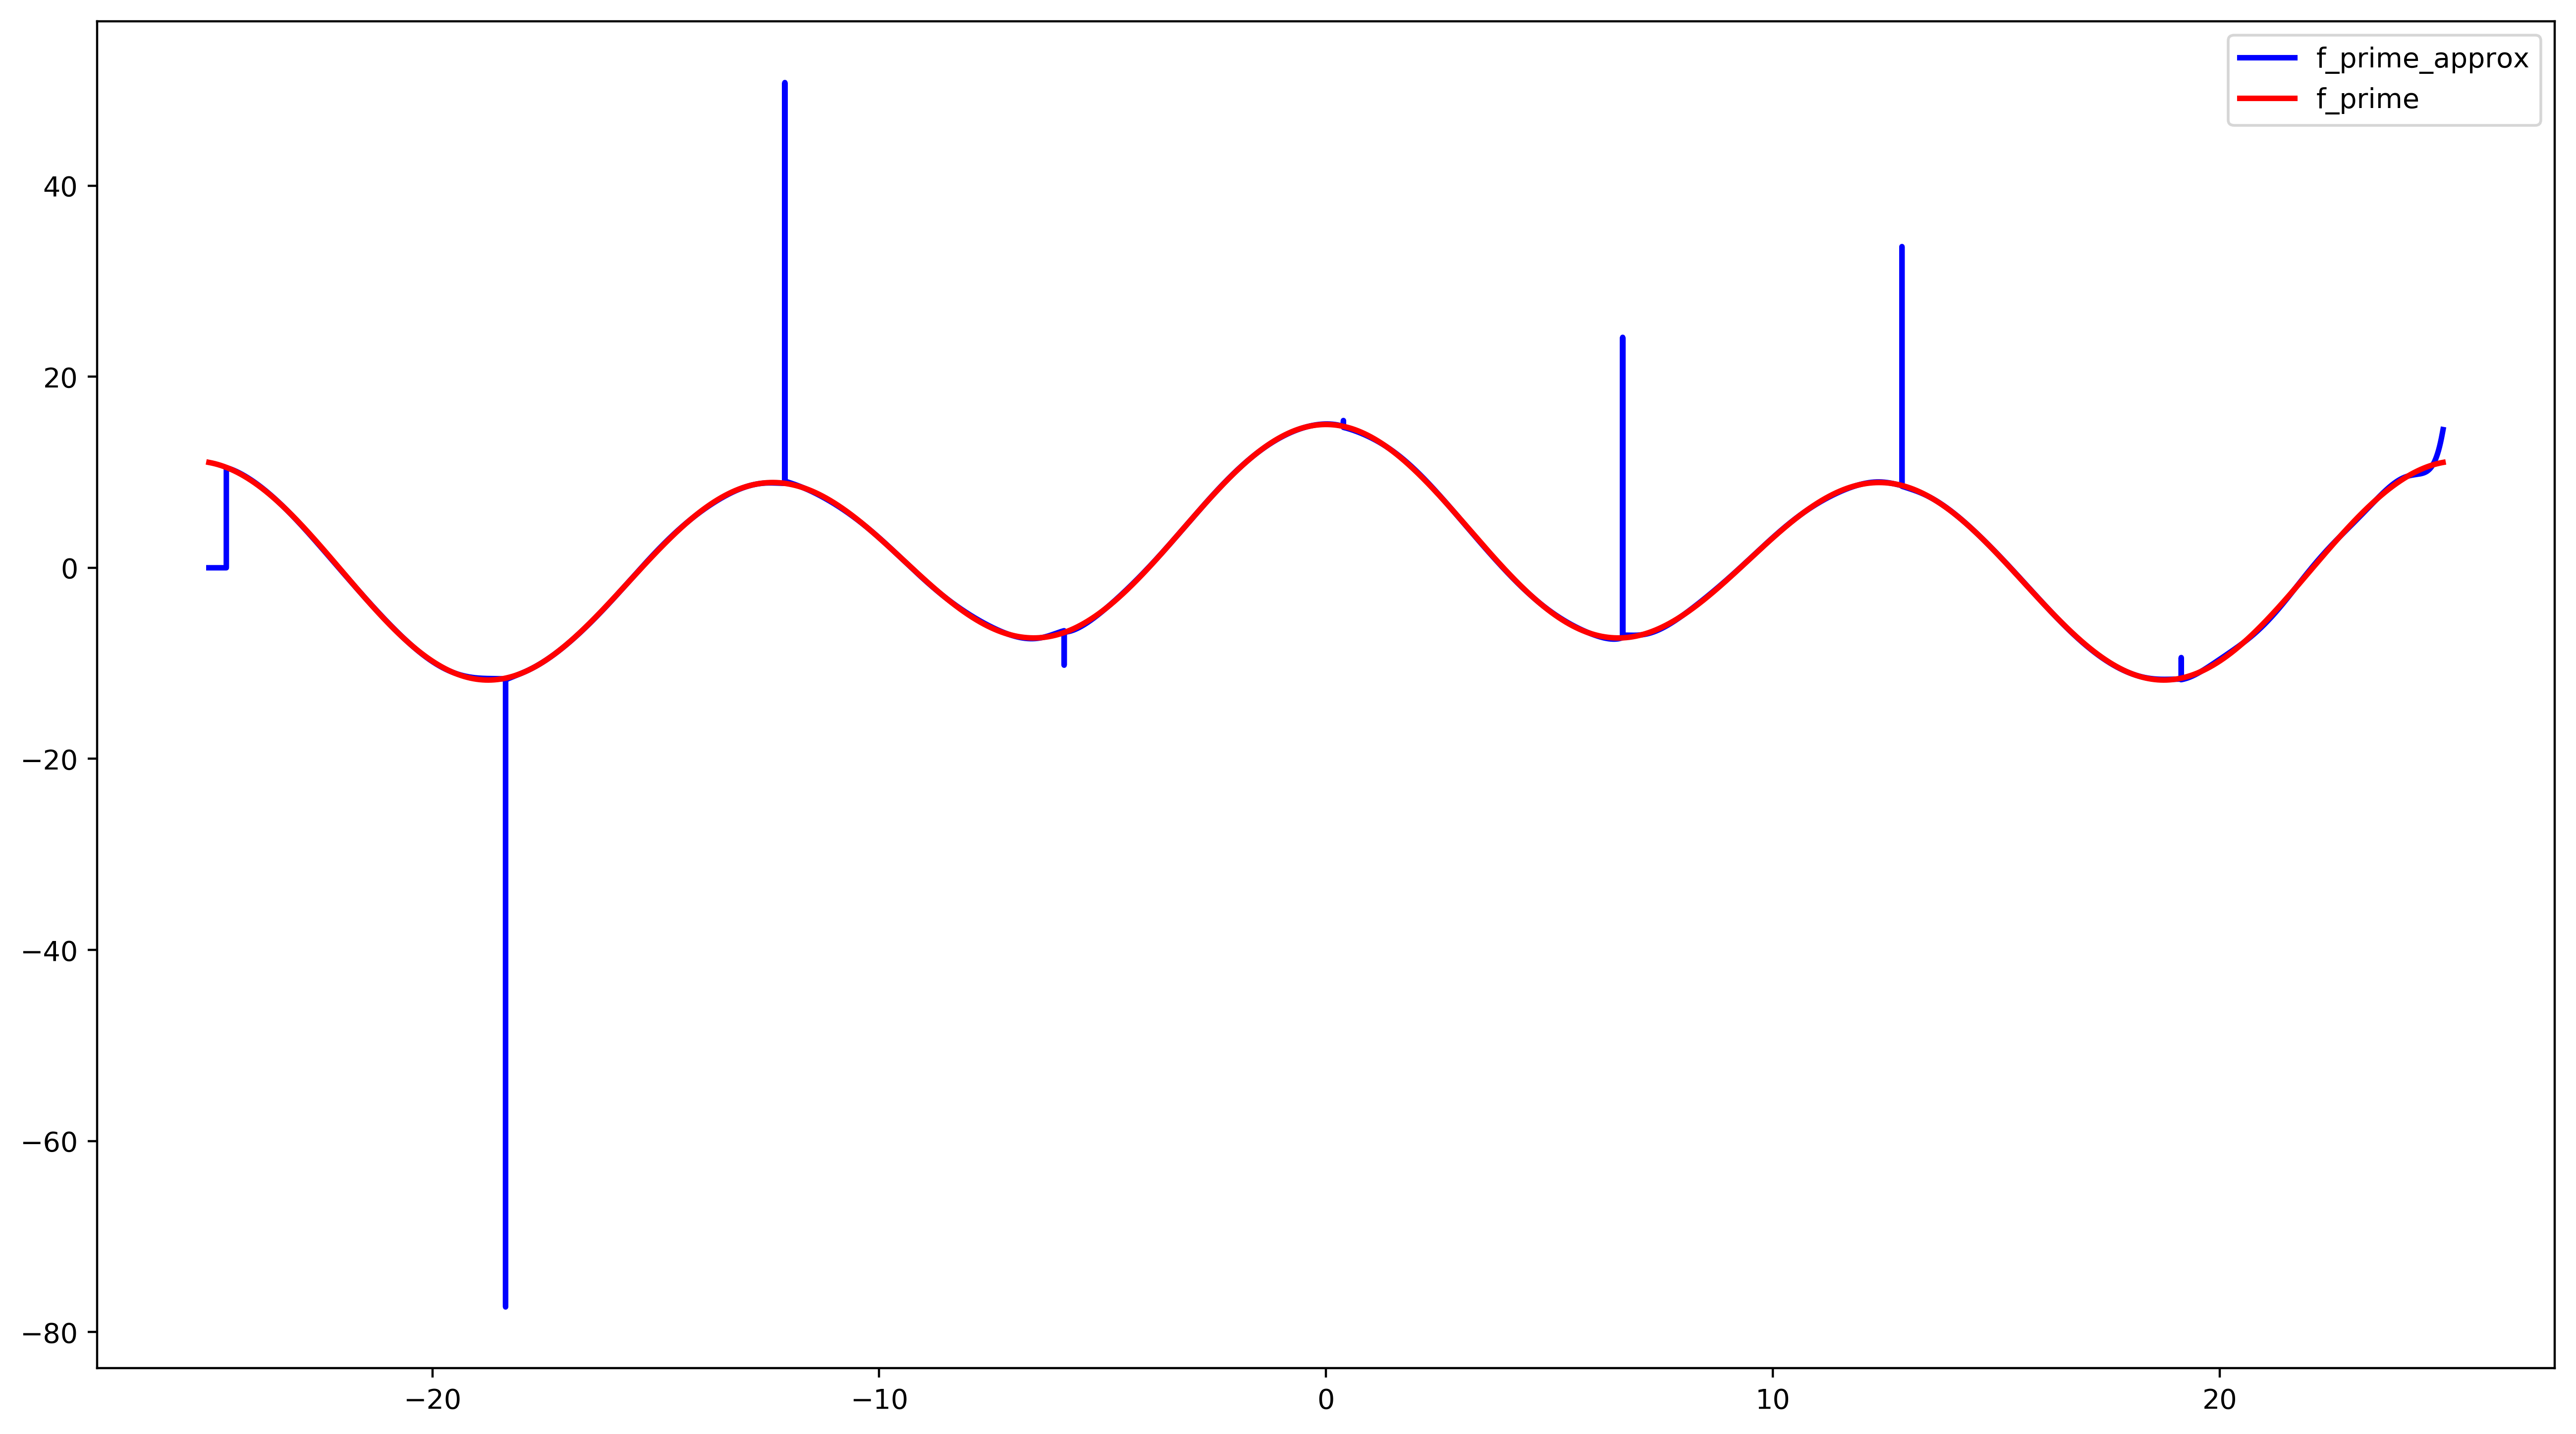

In [78]:
# diff = np.diff(approx, n=1)
# d = np.append(diff, np.zeros(len(approx) - len(diff)))
f_prime_approx = [(approx[i] - approx[i - 1]) / (x[i] - x[i - 1]) for i in range(1, len(approx))]
f_prime_approx += [f_prime_approx[-1]]

fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, f_prime_approx, color = 'blue', lw = 2, label = 'f_prime_approx')
subplot.plot(x, f_prime_vectorize(x), color = 'red', lw = 2, label = 'f_prime')
plt.legend()
plt.show()

In [81]:
#f_prime_approx[5119] = (f_prime_approx[5118] + f_prime_approx[5120]) / 2
# fig = plt.figure(figsize=(16,9), dpi=400)
# subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
# subplot.plot(x, f_prime_approx, color = 'blue', lw = 2, label = 'f_prime_approx')
# plt.legend()
# plt.show()

filter_prime = np.copy(f_prime_approx)
for i in range(indent, len(filter_prime)):
    if abs(filter_prime[i] - filter_prime[i - 1]) > 11:
        print(i)
        print(x[i])
        print(filter_prime[i - 1])
        print(filter_prime[i])
        filter_prime[i] = 2.0 * filter_prime[i - 1] - filter_prime[i - 2]

8703
-18.36003662165255
-11.63547499628625
-77.36510384847156
16895
-12.109941252765697
8.83530844155016
50.784141353272865
41471
6.640344853894867
-7.309250644268591
24.119460328018405
49663
12.89044022278172
8.600740645318368
33.61781696848789


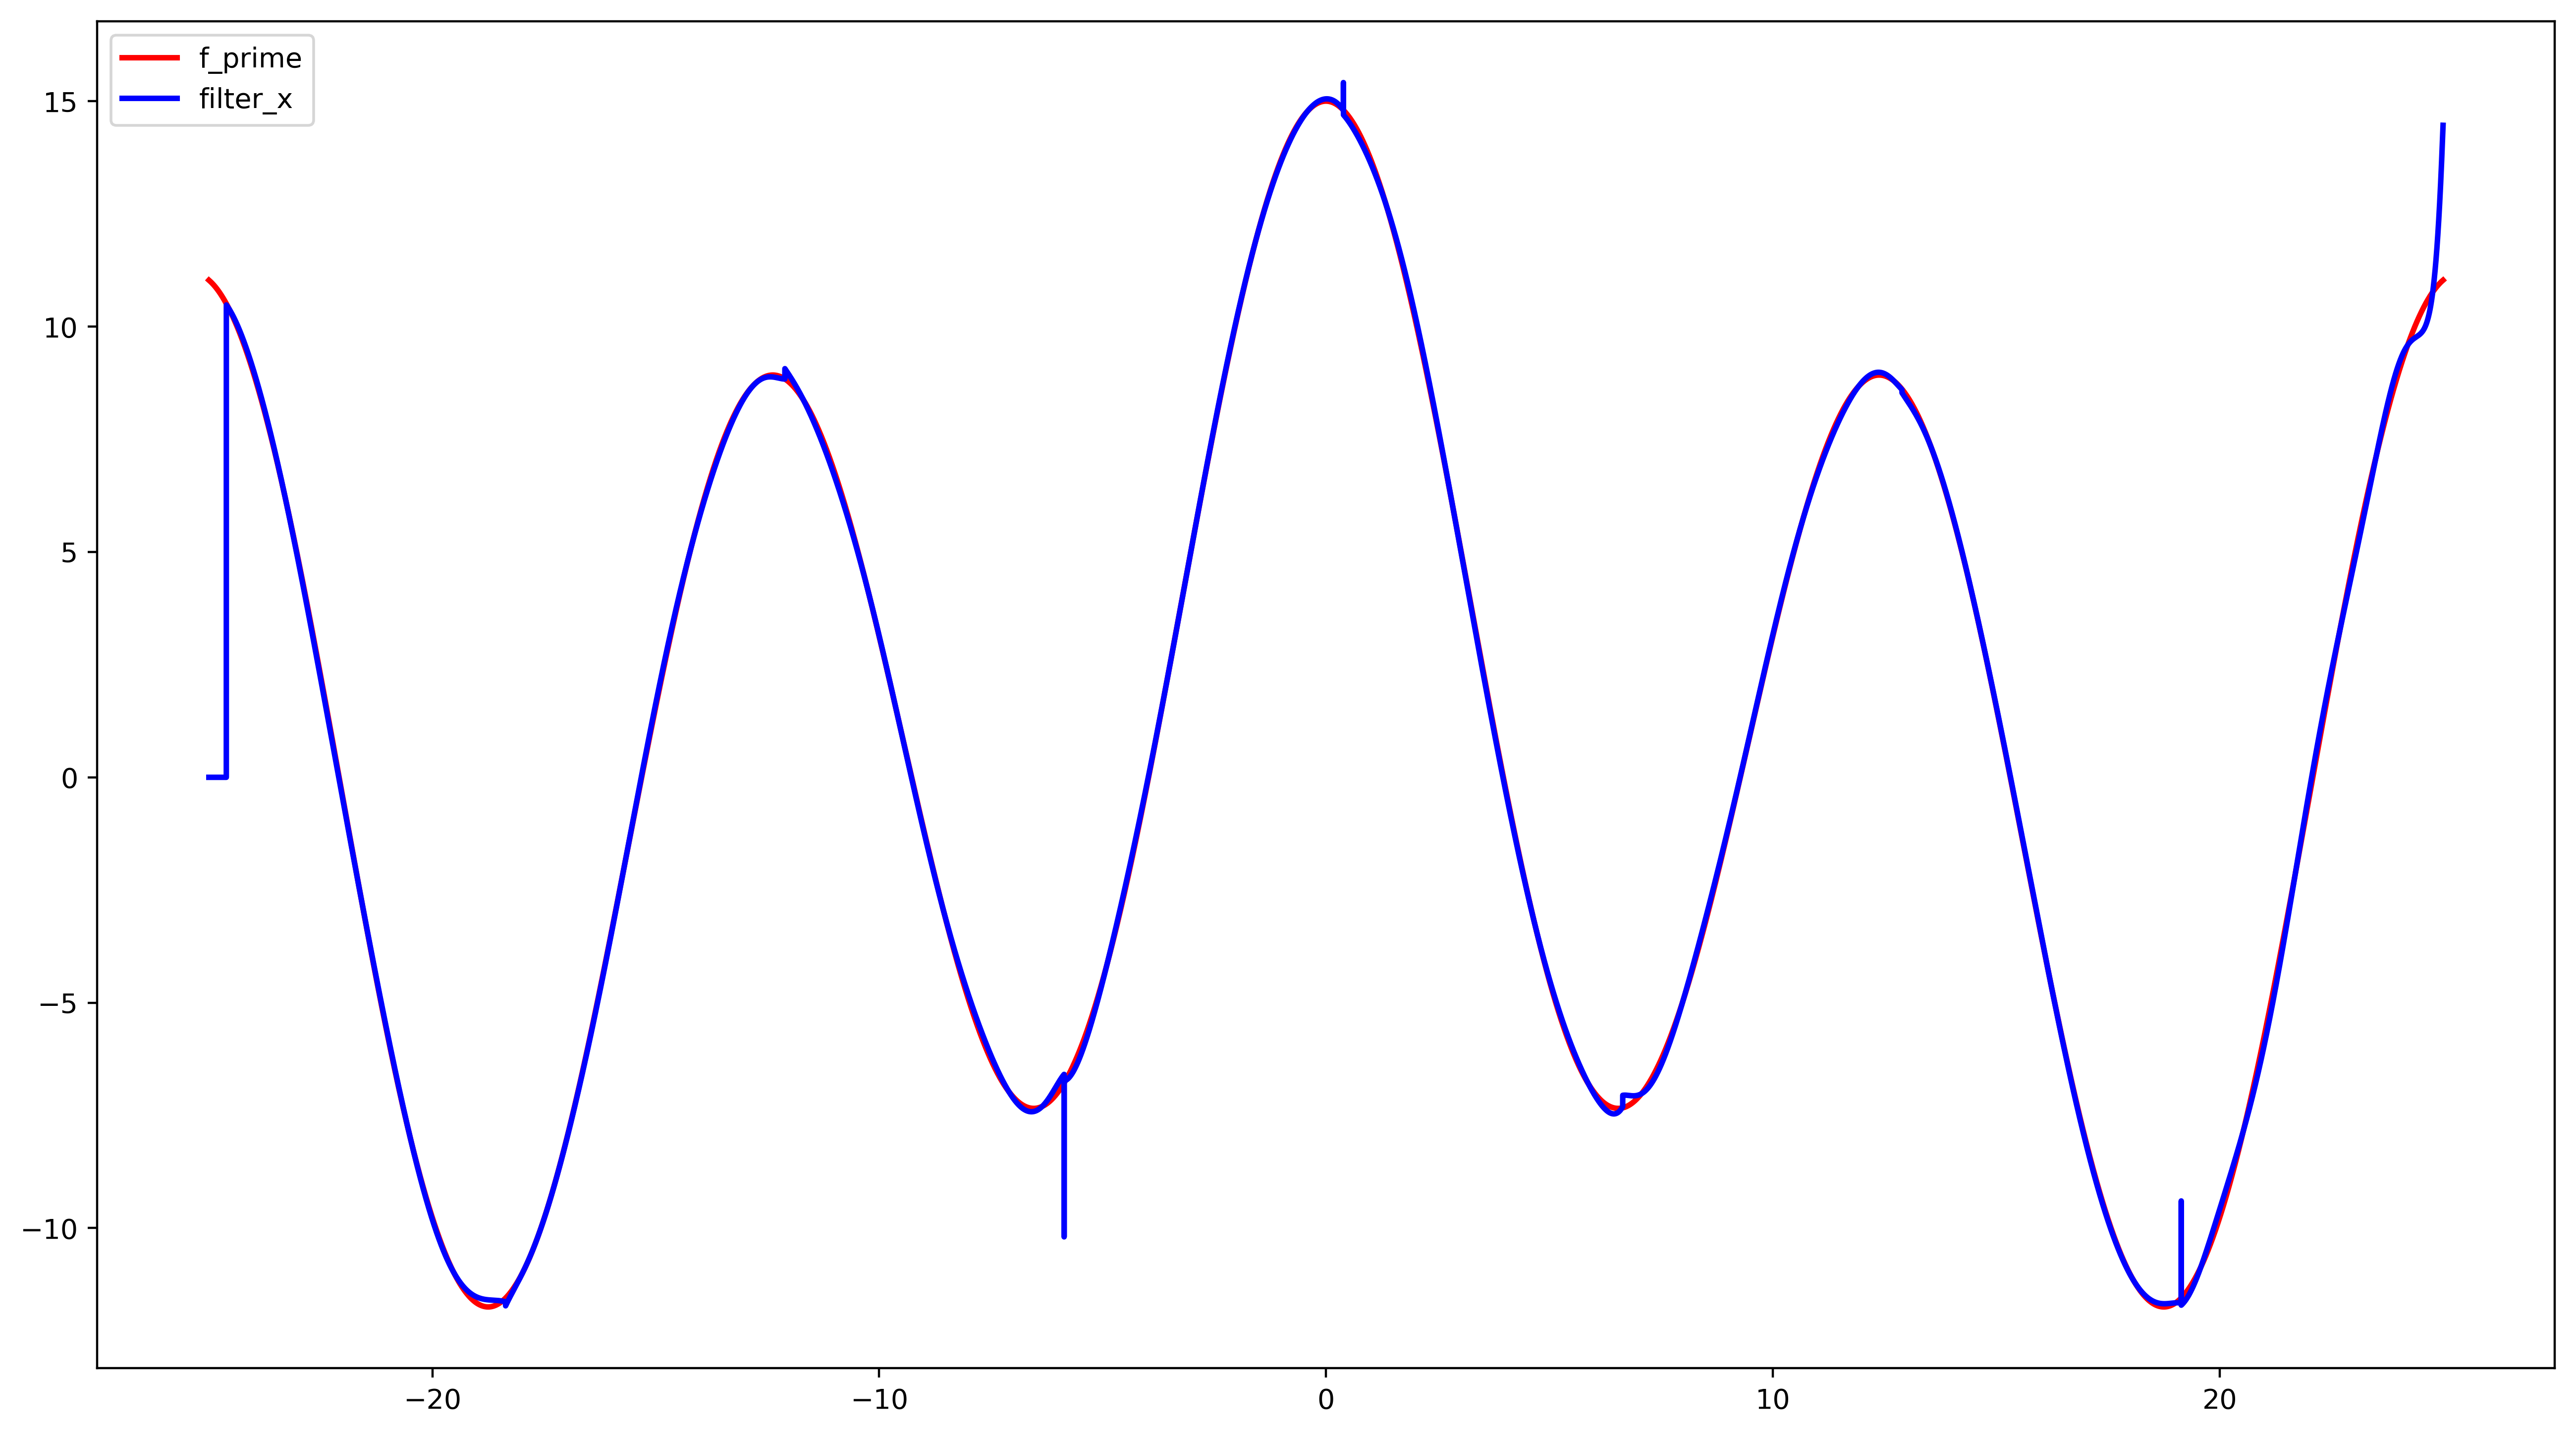

In [83]:
fig = plt.figure(figsize=(16,9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, f_prime_vectorize(x), color = 'red', lw = 2, label = 'f_prime')
subplot.plot(x, filter_prime, color = 'blue', lw = 2, label = 'filter_x')
plt.legend()
plt.show()